Research question:


Developing  a model that will pick the right plan for Megaline mobile carrier newer plans

Define the metric for success

Having a model that will recommend the right plan and meets the accuracy threshold of 0.75

Background  Statement

Mobile carrier Megaline has found out that many of their subscribers use legacy plans.
They want to develop a model that would analyze subscribers' behavior and recommend
one of Megaline's newer plans: Smart or Ultra.
You have access to behavior data about subscribers who have already switched to the
new plans (from the project for the Statistical Data Analysis course). For this
classification task, you need to develop a model that will pick the right plan. Since you’ve
already performed the data preprocessing step, you can move straight to creating the
model.

Develop a model with the highest possible accuracy. In this project, the threshold for
accuracy is 0.75. Check the accuracy using the test dataset.

Record the experimental design

1.Data Importation
2. Data Exploration
3. Data Preparation and Cleaning
4. Data Modeling 
(Using Decision Trees, Random Forest and Logistic Regression)
5. Hyparameter Tuning
6. Model Evaluation
7. Sanity check
8. Findings and Recommendation

Data Importation

In [ ]:
#Importing the libraries that we need
import numpy as np 
import pandas as pd

In [ ]:
#Loading dataset
df = pd.read_csv('https://bit.ly/UsersBehaviourTelco')


Data Exploration

In [ ]:
#Previewing our first five values in our dataset
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [ ]:
#Previewing our lasst  five values in our dataset
df.tail()

,calls,minutes,messages,mb_used,is_ultra
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0
3213,80.0,566.09,6.0,29480.52,1


In [ ]:
#preview the size of our dataset
df.shape

(3214, 5)

In [ ]:
#Previewing the summary of our dataset
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


● сalls — number of calls,

● minutes — total call duration in minutes,

● messages — number of text messages,

● mb_used — Internet traffic used in MB,

● is_ultra — plan for the current month (Ultra - 1, Smart - 0).

Data Preparation 

In [ ]:
#Finding null values in our df
df.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [ ]:
#Checking duplicates in our dataset
sum(df.duplicated())

#Our dataset has duplicate values

0

Data Modeling

Train,evaluate and prediction a model.

In [ ]:
# Import train_test_split from the sklearn.model_selection module
from sklearn.model_selection import train_test_split


In [ ]:
#split the data into train, validation, and test sets
# Let's  split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

features = df.drop(columns = ['is_ultra']).copy()
target = df['is_ultra']
# In the first step we will split the data in training and remaining dataset
features_train, features_rem, target_train, target_rem = train_test_split(X,y, train_size=0.8,random_state=12345)
# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
features_valid, features_test, features_valid, features_test = train_test_split(features_rem,target_rem, test_size=0.5,random_state=12345)
print(features_train.shape), print(target_train.shape)
print(features_valid.shape), print(target_valid.shape)
print(features_test.shape), print(features_test.shape)

(2571, 4)
(2571,)
(321,)
(1286,)
(322,)
(322,)


(None, None)

Hyparameter Tuning

1.Decision Tree Classifier model

In [ ]:
#Since we have already split our data we just proceed to  build and fit our model
#We now fit the model to determine the accuracy using Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import numpy as np


features=df.drop('is_ultra',axis=1)
target=df['is_ultra']
print(features.shape)
print(target.shape)



(3214, 4)
(3214,)


In [ ]:

features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.25,random_state=12345)
print(features_train.shape, target_train.shape,features_test.shape, target_test.shape)

(2410, 4) (2410,) (804, 4) (804,)


In [ ]:
model=DecisionTreeClassifier(max_depth=3,criterion = 'gini',random_state=12345)
model.fit(features_train,target_train)

y_pred= model.predict(features_test)
print('The model Accuracy is:{}'.format(accuracy_score(target_test,y_pred)))

The model Accuracy is:0.7885572139303483


Validating my decision tree model

In [ ]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, train_size=0.8,test_size=0.2,random_state=12345)
print(features_train.shape, target_train.shape,features_valid.shape, target_valid.shape)

(2571, 4) (2571,) (643, 4) (643,)


In [ ]:
model=DecisionTreeClassifier(max_depth=3,criterion = 'gini',random_state=12345)
model.fit(features_train,target_train)

y_pred= model.predict(features_valid)
print('The model Accuracy is:{}'.format(accuracy_score(target_valid,y_pred)))

The model Accuracy is:0.7838258164852255


Our accuracy is 0.788557 for the decision tree whereas the accuracy for our validating data is 0.7838258

Its normal for the accuracy of our validating data  to be lower hence showing that our model is not underfitting

2.Logistics Regression Model


In [ ]:
from sklearn.linear_model import LogisticRegression

features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.25,random_state=12345)
print(features_train.shape, target_train.shape,features_test.shape, target_test.shape)
#Create model
model = LogisticRegression(random_state=12345, solver='liblinear')
#Fitting my model
model.fit(features_train, target_train)

print(model.score(features_train, target_train))

(2410, 4) (2410,) (804, 4) (804,)
0.7045643153526971


Validating my logistic regression model

In [ ]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, train_size=0.8,test_size=0.2,random_state=12345)
print(features_train.shape, target_train.shape,features_valid.shape, target_valid.shape)


model = LogisticRegression(random_state=12345, solver='liblinear')
#Fitting my model
model.fit(features_valid, target_valid)

print(model.score(features_valid, target_valid))


(2571, 4) (2571,) (643, 4) (643,)
0.702954898911353


3.Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#creating model 
model = RandomForestRegressor(n_estimators=40, random_state=54321)

#Train the model
model.fit(features_train, target_train)

print(model.score(features_train, target_train))

0.8973141413607986


validating

In [ ]:
#creating model 
model = RandomForestRegressor(n_estimators=40, random_state=54321)

#Train the model
model.fit(features_valid, target_valid)

print(model.score(features_valid, target_valid))

0.8918067659110624


***Model evaluation***

Decision Tree - 0.7885572139303483

Linear regression - 0.7045643153526971

Random forest - 0.8973141413607986



Random Forest attained the highest accuracy score 0.897 .


**Sanity** **check**

0    0.700249
1    0.299751
Name: is_ultra, dtype: float64


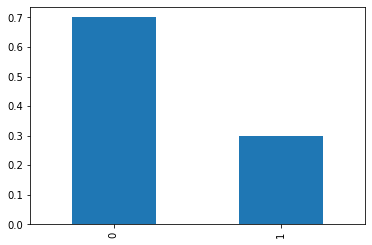

In [ ]:
#Obtain sanity check by counting the target variable's class frequencies
# Count classes in the target feature on the test dataset using value_counts() method
# We Make the frequencies relative (from 0 to 1)
testfrequency = target_test.value_counts(normalize = True)
# Print the frequencies on the screen
print(testfrequency)
# Display using plot() method

testfrequency.plot(kind = 'bar')


Findings and Recommendation


Random forest accuracy the model can be adopted by the company for the customers
subscription plan since it has the highest accuracy score.
